In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei' #顯示中文

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 資料載入與探索

In [3]:
# Load in the train datasets
train = pd.read_csv('input/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('input/test.csv', encoding = "utf-8")
submission = pd.read_csv('input/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

In [4]:
train.head(3)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1


In [5]:
test.head(3)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2


In [6]:
submission.head(3)

,id,type
0,1,1
1,2,1
2,3,1


## Data clean - 缺值處理

In [7]:
#missing data
miss_sum = train.isnull().sum().sort_values(ascending=False)
miss_sum

花萼寬度    1
花萼長度    1
type    0
屬種      0
花瓣寬度    0
花瓣長度    0
id      0
dtype: int64

In [8]:
#查詢那幾筆是空值
print(train[train['花萼寬度'].isnull()])
print("--------------------------------")
print(train[train['花萼長度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4
--------------------------------
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4


In [9]:
#直接把 NaN drop (如果筆數很少,不影響建模的時候)
train_d_na = train.dropna().reset_index(drop=True)
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

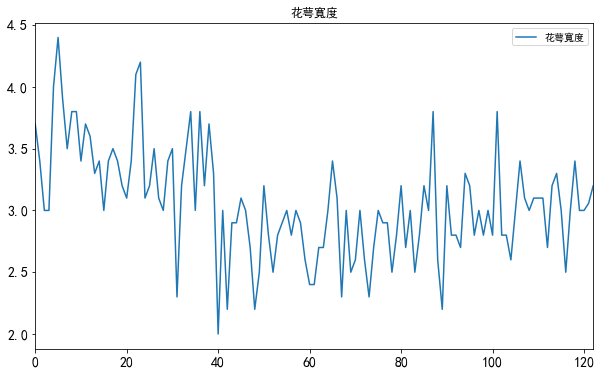

In [10]:
#將空值補平均數
#train.loc[train['花萼寬度'].isnull(),['花萼寬度']] = train['花萼寬度'].mean() #花萼寬度:第2欄
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))

train.plot(kind='line',y='花萼寬度',figsize=(10,6),fontsize=14,title='花萼寬度')

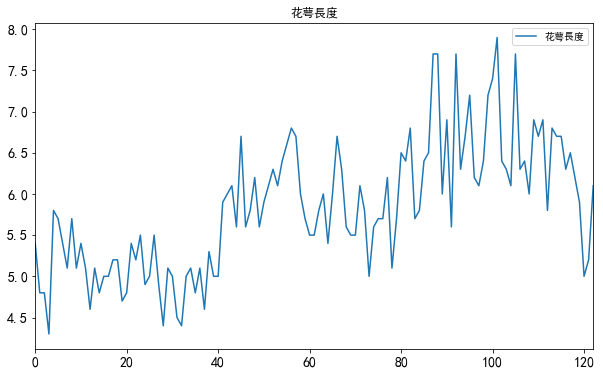

In [11]:
#將空值補眾數
#train.loc[train['花萼長度'].isnull(),['花萼長度']] = train['花萼長度'].mode()[0] #花萼長度:第1欄
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0])

train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A1E2080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B868C50>]], dtype=object)

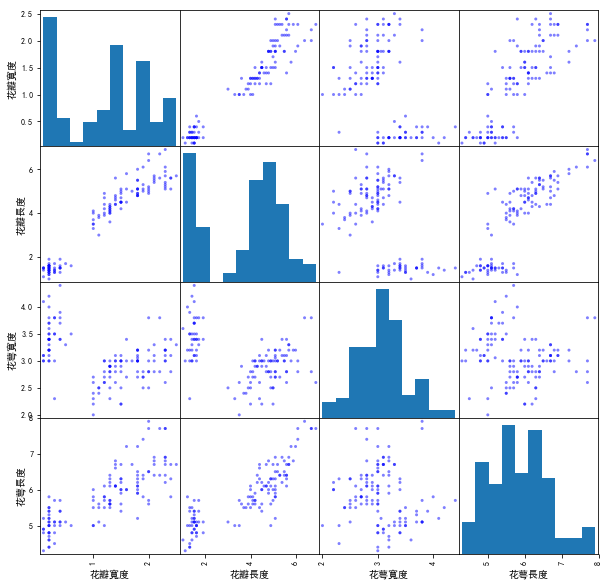

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix( train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']],figsize=(10, 10),color='b')

## 相關分析

In [13]:
corr = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']].corr()
print(corr)

          花瓣寬度      花瓣長度      花萼寬度      花萼長度
花瓣寬度  1.000000  0.958595 -0.367957  0.810219
花瓣長度  0.958595  1.000000 -0.436213  0.850649
花萼寬度 -0.367957 -0.436213  1.000000 -0.130174
花萼長度  0.810219  0.850649 -0.130174  1.000000


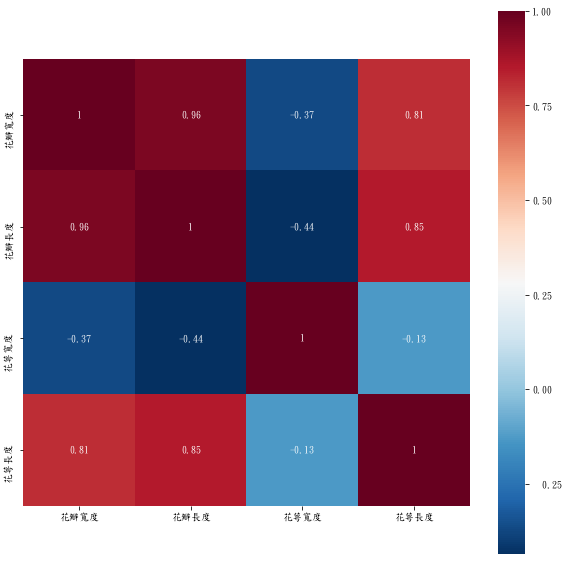

In [14]:
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

# http://seaborn.pydata.org/tutorial/color_palettes.html

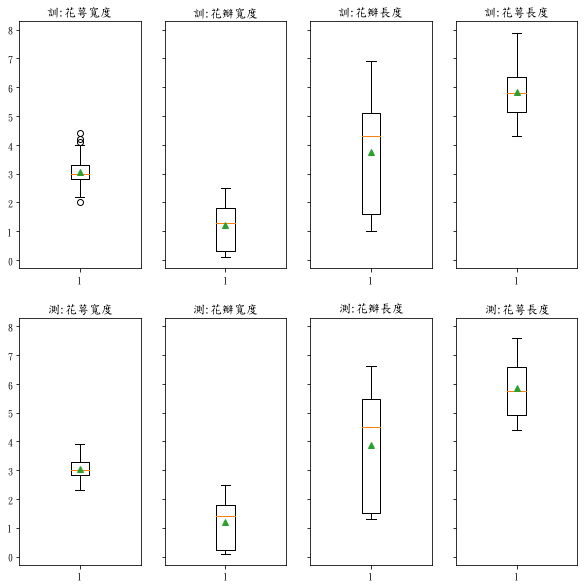

In [15]:
#train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10), sharey=True)

axes[0, 0].boxplot(train['花萼寬度'],showmeans=True)
axes[0, 0].set_title('訓:花萼寬度')

axes[0, 1].boxplot(train['花瓣寬度'],showmeans=True)
axes[0, 1].set_title('訓:花瓣寬度')

axes[0, 2].boxplot(train['花瓣長度'],showmeans=True)
axes[0, 2].set_title('訓:花瓣長度')

axes[0, 3].boxplot(train['花萼長度'],showmeans=True)
axes[0, 3].set_title('訓:花萼長度')

axes[1, 0].boxplot(test['花萼寬度'],showmeans=True)
axes[1, 0].set_title('測:花萼寬度')

axes[1, 1].boxplot(test['花瓣寬度'],showmeans=True)
axes[1, 1].set_title('測:花瓣寬度')

axes[1, 2].boxplot(test['花瓣長度'],showmeans=True)
axes[1, 2].set_title('測:花瓣長度')

axes[1, 3].boxplot(test['花萼長度'],showmeans=True)
axes[1, 3].set_title('測:花萼長度')

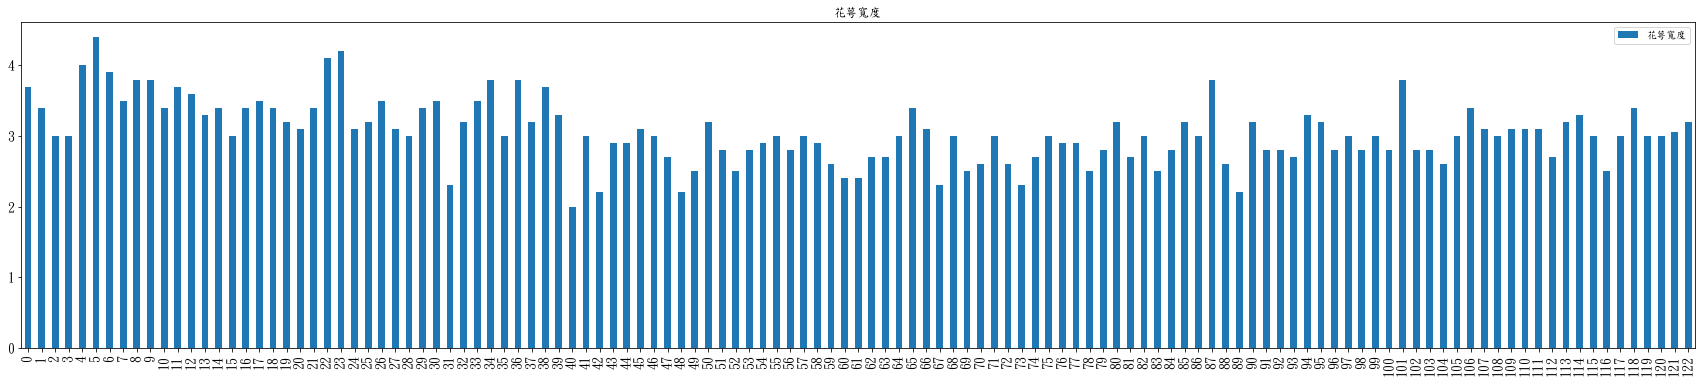

In [16]:
train.plot(kind='bar',y='花萼寬度',figsize=(30,6),fontsize=14,title='花萼寬度')

In [17]:
#IRQ = Q3-Q1
IRQ = np.percentile(train['花萼寬度'],75) - np.percentile(train['花萼寬度'],25)

In [18]:
#outlier = Q3 + 1.5*IRQ , or. Q1 - 1.5*IRQ
train[train['花萼寬度'] > np.percentile(train['花萼寬度'],75)+1.5*IRQ]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
5,6,5.7,4.4,1.5,0.4,Iris-setosa,1
22,23,5.2,4.1,1.5,0.1,Iris-setosa,1
23,24,5.5,4.2,1.4,0.2,Iris-setosa,1


In [19]:
#outlier = Q3 + 1.5*IRQ , or. Q1 - 1.5*IRQ
train[train['花萼寬度'] < np.percentile(train['花萼寬度'],25)-1.5*IRQ]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
40,41,5.0,2.0,3.5,1.0,Iris-versicolor,2


In [20]:
#fix_X = X.drop(X.index[[5,23,40]])
#fix_y = y.drop(y.index[[5,23,40]])

## 切分資料 (從官方的training data切分出來)

In [21]:
#把示範用的 type 4, 資料去除, 以免干擾建模
train = train[train['type']!=4]

In [22]:
from sklearn.model_selection import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

## 標準化

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
X_train_std[0:5]

array([[ 0.82172682,  1.27937769,  0.47468749,  1.65481456],
       [ 1.36523117,  1.04600587, -0.44195042,  0.65747341],
       [-1.35229059, -1.2877124 ,  0.24552801, -1.33720889],
       [ 0.41409855,  0.22920447,  0.01636853,  0.03413519],
       [-1.08053842, -1.46274127,  2.07880383, -0.58920303]])

In [25]:
y_test[0:5]

69     2
54     2
37     1
46     2
106    3
Name: type, dtype: int32

## 建立初步模型

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.90      0.90      0.90        10
          3       0.92      0.92      0.92        12

avg / total       0.94      0.94      0.94        36

[[14  0  0]
 [ 0  9  1]
 [ 0  1 11]]


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

oob_score(accuary): 0.916666666667
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36



## 貝式分類器

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.90      0.90      0.90        10
          3       0.92      0.92      0.92        12

avg / total       0.94      0.94      0.94        36

[[14  0  0]
 [ 0  9  1]
 [ 0  0 12]]


## SVM

In [29]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.90      0.90      0.90        10
          3       0.92      0.92      0.92        12

avg / total       0.94      0.94      0.94        36

[[14  0  0]
 [ 0  9  1]
 [ 0  0 12]]


## Stacking
website: http://rasbt.github.io/mlxtend/

In [30]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
clf3 = GaussianNB()
clf4 = SVC(C=1.0, kernel="rbf")
meta_clf = xgb.XGBClassifier()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier=meta_clf)

clf1.fit(X_train_std, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train_std, y_train)
clf4.fit(X_train_std, y_train)
stacking_clf.fit(X_train_std, y_train)

print('KNN Score:',clf1.score(X_test_std, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test_std, y_test))
print('SVC Score:',clf4.score(X_test_std, y_test))
print('Stacking Score:',stacking_clf.score(X_test_std, y_test))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNN Score: 0.944444444444
RF Score: 0.972222222222
GNB Score: 0.972222222222
SVC Score: 0.972222222222
Stacking Score: 0.972222222222


## XGBoost

詳細說明: 
         <p>(ENG) https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/</p>
         <p>(CHT) http://www.itread01.com/articles/1476146171.html</p>

In [31]:
import xgboost as xgb

gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(X_test)))
print("Score:", gbm.score(X_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

Score: 0.972222222222


In [32]:
print(gbm.feature_importances_)

[ 0.23069175  0.1608462   0.53055739  0.07790463]


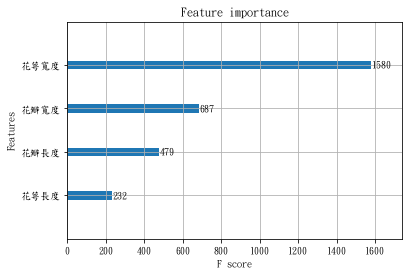

In [33]:
from xgboost import plot_importance
plot_importance(gbm, )
plt.show()

In [34]:
pred = gbm.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

In [35]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3])

In [36]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'id': submission.id, 'type': pred })
StackingSubmission.to_csv("submission.csv", index=False)

In [37]:
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [38]:
test[20:30]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
20,21,6.3,3.3,6.0,2.5
21,22,5.8,2.7,5.1,1.9
22,23,7.1,3.0,5.9,2.1
23,24,6.3,2.9,5.6,1.8
24,25,6.5,3.0,5.8,2.2
25,26,7.6,3.0,6.6,2.1
26,27,4.9,2.5,4.5,1.7
27,28,7.3,2.9,6.3,1.8
28,29,6.7,2.5,5.8,1.8
29,30,7.2,3.6,6.1,2.5
